# Introduction


By Ipshita Singh (3121217) & Justin Chin Chung Shin (3120632)

---


Depression is a widespread mental health disorder affecting millions globally. Symptoms of depression and its severity can vary from person to person. **Common symptoms of depression include** :

**Emotional symptoms**

*   Persistent Sadness, emptiness, or hopelessness
*   Feeling irritable or restless
*   Loss of interest or pleasure in activities once enjoyed
*   Feelings of guilt, worthlessness, or helplessness
*   Low self-esteem
*   Difficulty concentrating, remembering, or making decisions

**Physical symptoms**

*   Changes in appetite or weight (either increased or decreased)
*   Sleep disturbances (insomnia or sleeping too much)
*   Fatigue or lack of energy
*   Aches or pains, headaches, or digestive problems
*   Reduced sex drive

**Behavioral symptoms**

*   Social withdrawal
*   Neglect of personal hygiene
*   Difficulty performing at work or school
*   Increased use of alcohol or drugs
*   Thoughts of self-harm or suicide

Thus, early detection and intervention are critical for managing depression effectively.












Words, Languages, and expression can tell a lot about someone. In fact, the words used , how are the words being used , how frequent the words are being used and keywords can be used to detect sentiment or feelings especially in social media where everyone feels safe and comfortable sharing posts or comments about their experience due to anonymosity. With everything being said, by leveraging NLP (Natural Language Processing) , ML (Machine Learning) ,DL (Deep Learning) and comments from social media, depression sentiments can be predicted and detected.


**Note that Sina Weibo (Chinese Social Media) comments are being used for the proof of concept to train the models **



# The Evolution Of Sentimental Analysis





---



**Back in the early 2000s**

*   The birth of sentimental analysis as a subfield of NLP .

**During the year 2003**

*   sentimental analysis was also termed as opinion mining . At the time, opinion mining was achieved by determining the polarity of textual data, basically classifying text as positive , negative or neutral whereby a lexicon or a list of predefined keywords were used to predict or categorize sentiment. However, this approach had its limitation as rule based detection can only work within the textual data that comply with the set rules so accuracy can greatly vary if there were outliers that do not comply due to context, sarcasm, nuance, and language.

**The Modern Day**

*   The advancement of NLP and machine learning lead to more sophisticated sentimental analysis algorithms as the utilization of machine learning model enable the capability to detect and recognize sentiment pattern in textual data. Since then, the popularity of sentimental analysis began to rise and more companies taking initiatives to utilize sentimental analysis for business needs. For example : monitoring customer feedback, gauge public opinion , predicting financial fraud and more .


**The Next Step For Sentimental Analysis**


*   Emotion detection is clearly the next step for sentimental analysis as basic sentimental analysis only involve classifying text within the range of positive, neutral and negative while emotion detection will go beyond sentiment polarity , capable of detecting & recognizing emotions and emotional undertones or expressions such as sarcasm, satire, humour, joy, surprise, fear and disgust.


*  By leveraging the capability of emotion detection,various industry can benefit significantly . Examples of Application include :     


1.   Financial Sentiment Calibration
2.   Customer Feedback Optimisation
3.   Mental Health Assistant
4.   Political Analysis
5.   Marketing & Advertising
















# Aim



---


*   The objective is to identify the best sentimental analysis model in terms of detecting and predicting depression sentiment in chinese textual data or user comments from Sina Weibo, also in terms of stability.
















# Rule Of The Chinese Language



---



**Key Characteristics of Chinese Grammar**


1.   **No Verb Conjugations**: Verbs maintain their form regardless of person, number, or tense.
2.   **No Articles**: Chinese doesn't use articles like "the" or "a."
3. **No Plural Forms**: Plurality is often implied or indicated by context or quantity words.
4. **Subject-Verb-Object (SVO) Order**: This is the basic sentence structure.
5. **Particles**: These small words help indicate tense, aspect, mood, and other nuances.
6. **Word Order is Crucial**: The position of words in a sentence determines meaning.


**Basic Sentence Structure**
A simple Chinese sentence follows the Subject-Verb-Object (SVO) order:



*   **Subject**: The person or thing performing the action.
*   **Verb**: The action being performed.
*   **Object**: The person or thing receiving the action.


**Example:**
我 吃 苹果 (Wǒ chī píngguǒ) - I eat apple.

**Other Important Points To Note**

*   **Tone**: Chinese is a tonal language, meaning the pitch of your voice can change the meaning of a word.
*   **Characters**: Chinese uses characters instead of an alphabet, and each character represents a word or concept.
*   **Idioms**: Chinese is rich in idioms, which can be challenging for learners.














# Proof Of Concept

**There are 4 sections to the proof of concepts :**   


*   Data Preprocessing - Preparing of chinese textual data (comments) in order to ensure readiness for model training.

*   Machine Learning (Training & Evaluating) - Training ML models (linear regression, random forest , and a custom ensemble-model through models stacking classification) while also evaluating them.

*   Deep Learning (Training & Evaluating) - Training torch Neural networks (BiLSTM RNN model) and transformer (BERT) , also evaluating them.

*   Prototype - Based on the result of the evaluations, demonstrate the pipeline from raw comments to prediction with the best model (in terms of stability and accuracy)


## Data Preprocessing

In order to preprocess data, we require data . To be more specific, the social media comments from Sina Weibo (chinese textual data).

To achieve this, google collab platform will perform a git clone to clone the required data and lexicon onto the platform itself for ease of use, so no uploading is required.

Basically, the rest is just installing required python libraries and importing them for use. Create a models directory to store saved models and reading the lexicon into a pandas dataframe (consists of context which are keywords and depression_point which is the sentiment point whereby 1 = depressed and 0 = healthy)

In [ ]:
!git clone https://github.com/CuteDandelion/DepressionDetectionDataset_Chinese.git
!pip install emoji
!pip install google_trans_new
!pip install thulac
!pip install Keras-Preprocessing


import nltk
import pandas as pd
import csv
import re
import pandas as pd
import numpy as np
import pandas as pd

from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import os

directory_name = "models"
os.makedirs(directory_name, exist_ok=True)

#The lexicon include keywords that are commonly assiociated with depression

lexicon_df = pd.read_csv("/content/DepressionDetectionDataset_Chinese/depressionLexiconNew.csv", encoding="utf-8")
lexicon_df.head(10)

Cloning into 'DepressionDetectionDataset_Chinese'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 0), reused 3 (delta 0), pack-reused 6 (from 1)
Receiving objects: 100% (9/9), 80.54 MiB | 10.56 MiB/s, done.
Updating files: 100% (5/5), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00


,context,depression_point
0,抑郁,1
1,崩溃,1
2,压力,1
3,自杀,1
4,绝食,1
5,焦躁,1
6,伤心,1
7,疲惫,1
8,死亡,1
9,孤独,1


The purpose here is basically to initialize the dataframe namely df with Tweet being the chinese comments and Depressed being the depression state (consist of 2 classes 0 being healthy and 1 being depressed) by concatinating male depression comments , female depression comments and male control comments (which consists of healthy comments).

The reason female control comments is not added is because


1.   the variety of depressed comments are being priotized due to the fact that if the model can recognize depressed comments than the others must be healthy comments.
2.   The list of healthy comments for female audience is huge.



In [ ]:
#Initializing starting dataframe with tweet being the comments text
# and depressed being the state of depression

control_file = '/content/DepressionDetectionDataset_Chinese/control_comments_male.txt'
depressed_file_male = '/content/DepressionDetectionDataset_Chinese/depressed_comments_male.txt'
depressed_file_female = '/content/DepressionDetectionDataset_Chinese/depressed_comments_female_origin.txt'

with open(depressed_file_female, "r", encoding="utf-8") as dfe:
    dfe_lines = dfe.readlines()
    dfe_lines = [x.replace("\n","") for x in dfe_lines]

with open(depressed_file_male, "r", encoding="utf-8") as d:
    d_lines = d.readlines()
    d_lines = [x.replace("\n","") for x in d_lines]

with open(control_file, "r", encoding="utf-8") as c:
    c_lines = c.readlines()
    c_lines = [x.replace("\n","") for x in c_lines]

depressed_male = pd.DataFrame(d_lines,columns=["Tweet"])
depressed_male["Depressed"] = 1
depressed_female = pd.DataFrame(dfe_lines,columns=["Tweet"])
depressed_female["Depressed"] = 1
control = pd.DataFrame(c_lines,columns=["Tweet"])
control["Depressed"] = 0

df = pd.concat([depressed_male, depressed_female, control], ignore_index=True)
df = df[df['Tweet'] != '']
df = df[df['Tweet'] != '转发微博']
df = df.sample(frac = 1)
df.reset_index(drop=True, inplace=True)
df.head(50)

,Tweet,Depressed
0,今天#摄影##2020高考必胜# 北京,0
1,直线下降的体重，和撕裂般疼痛的胃。报应一样，诅咒一样的活着。,1
2,#成都纹身##成都传统纹身# 🐯 成都,0
3,学校广播台真棒，放了一早上五月天的歌 网页链接,1
4,#重庆事儿#没有华丽的语言发个图就好 重庆·观音桥,0
5,感恩亲爱的你们 是你你们陪我走过那个寒冷的冬季 也是你们教会我做一个有底线的人 ...,1
6,想一想我去年暑假胖的连裙子都不敢穿。今年都已经可以穿短裤了。争取明年可以穿旗袍。这真是一个励...,1
7,#海上日出# 穿着羽绒服还冻的不行 爱睡觉的不乖七七的秒拍视频,1
8,又做梦了 又做了噩梦 梦里其实没有什么恐怖的人 但是就是害怕 人让我害怕 氛围压抑窒息 醒来...,1
9,突然觉得自己跟个笑话一样,1


In [ ]:
print("Dataset size:",df.shape)
df.groupby("Depressed").count()

Dataset size: (954637, 2)


,Tweet
Depressed,
0,394006
1,560631


Basically, the code below describe the

*   removal of " " or empty comments from dataframe.

*   utilization of emoji library to detect emojicons in comments or tweets and translate each emoji to their respective chinese representations.

*   the use of regular expressions to substitute all non chinese symbols for each comment or tweet in the dataframe into "" (basically removing non chinese symbols)




In [ ]:
from google_trans_new import google_translator as Translator
from joblib import Parallel, delayed
import thulac #https://github.com/thunlp/THULAC-Python
import emoji

translator = Translator()
chinese_tokenizer = thulac.thulac(seg_only=True)

def remove_noice(tweet):
     tweet = re.sub(r"[^\u4e00-\u9fff]","", tweet.strip())
     return tweet.replace(" ","")

def replace_emoji(tweet):
  emoji_list = emoji.distinct_emoji_list(tweet)

  def translate_emoji(emoji_icon):
    first_token = next(emoji.analyze(emoji_icon))
    return first_token.value.data['zh'] if first_token else ""

  for emoji_icon in emoji_list:
    tweet = tweet.replace(emoji_icon, translate_emoji(emoji_icon))
  return tweet



df = df[df['Tweet'] != " "]
df["emojilessTweet"] = df["Tweet"].apply(lambda x: replace_emoji(x))
df["noiselessTweet"] = df["emojilessTweet"].apply(lambda x: remove_noice(x))



Model loaded succeed


In [ ]:
df.head(50)

,Tweet,Depressed,emojilessTweet,noiselessTweet
0,今天#摄影##2020高考必胜# 北京,0,今天#摄影##2020高考必胜# 北京,今天摄影高考必胜北京
1,直线下降的体重，和撕裂般疼痛的胃。报应一样，诅咒一样的活着。,1,直线下降的体重，和撕裂般疼痛的胃。报应一样，诅咒一样的活着。,直线下降的体重和撕裂般疼痛的胃报应一样诅咒一样的活着
2,#成都纹身##成都传统纹身# 🐯 成都,0,#成都纹身##成都传统纹身# :老虎头: 成都,成都纹身成都传统纹身老虎头成都
3,学校广播台真棒，放了一早上五月天的歌 网页链接,1,学校广播台真棒，放了一早上五月天的歌 网页链接,学校广播台真棒放了一早上五月天的歌网页链接
4,#重庆事儿#没有华丽的语言发个图就好 重庆·观音桥,0,#重庆事儿#没有华丽的语言发个图就好 重庆·观音桥,重庆事儿没有华丽的语言发个图就好重庆观音桥
5,感恩亲爱的你们 是你你们陪我走过那个寒冷的冬季 也是你们教会我做一个有底线的人 ...,1,感恩亲爱的你们 是你你们陪我走过那个寒冷的冬季 也是你们教会我做一个有底线的人 ...,感恩亲爱的你们是你你们陪我走过那个寒冷的冬季也是你们教会我做一个有底线的人能让你自己开心的事...
6,想一想我去年暑假胖的连裙子都不敢穿。今年都已经可以穿短裤了。争取明年可以穿旗袍。这真是一个励...,1,想一想我去年暑假胖的连裙子都不敢穿。今年都已经可以穿短裤了。争取明年可以穿旗袍。这真是一个励...,想一想我去年暑假胖的连裙子都不敢穿今年都已经可以穿短裤了争取明年可以穿旗袍这真是一个励志的故...
7,#海上日出# 穿着羽绒服还冻的不行 爱睡觉的不乖七七的秒拍视频,1,#海上日出# 穿着羽绒服还冻的不行 爱睡觉的不乖七七的秒拍视频,海上日出穿着羽绒服还冻的不行爱睡觉的不乖七七的秒拍视频
8,又做梦了 又做了噩梦 梦里其实没有什么恐怖的人 但是就是害怕 人让我害怕 氛围压抑窒息 醒来...,1,又做梦了 又做了噩梦 梦里其实没有什么恐怖的人 但是就是害怕 人让我害怕 氛围压抑窒息 醒来...,又做梦了又做了噩梦梦里其实没有什么恐怖的人但是就是害怕人让我害怕氛围压抑窒息醒来的时候总会觉...
9,突然觉得自己跟个笑话一样,1,突然觉得自己跟个笑话一样,突然觉得自己跟个笑话一样


Filter the lexicon so that it consists only keywords assosiate with depression and convert the result into a list.

generate a dataframe namely filtered_depressed_df by concatenation of targeted (being comments which contains the depressed keywords provided by the lexicon) and not targeted (being comments which does not contain the keywords provided by lexicon but still categorized as depressed comments)

The reason being


1.   To manage and provide control over the size of datasets to reduce the time spent and resource used to remove stopwords and tokenization of chinese characters as it is different from english .
2.   An attempt to reduce or minimize overfitting and bias so that the training set and testing set does not contain only comments assosiated with the lexicon but also of different depressed comment varieties.



In [ ]:
depressed_lexicon_keywords = lexicon_df["context"][lexicon_df["depression_point"]==1].tolist()
pattern = re.compile('|'.join(depressed_lexicon_keywords))

filtered_depressed_df = df[df['Depressed'] == 1]
filtered_depressed_df_targeted = filtered_depressed_df[filtered_depressed_df["noiselessTweet"].astype(str).apply(lambda x: pattern.search(x) is not None)].sample(n=500, random_state=42)
filtered_depressed_df_notTargeted = filtered_depressed_df[filtered_depressed_df["noiselessTweet"].astype(str).apply(lambda x: pattern.search(x) is None)].sample(n=500, random_state=42)
filtered_depressed_df = pd.concat([filtered_depressed_df_targeted, filtered_depressed_df_notTargeted], ignore_index=True)
filtered_depressed_df.count()

,0
Tweet,1000
Depressed,1000
emojilessTweet,1000
noiselessTweet,1000


To generate a dataframe containing healthy comments which have the same number of records as depressed comments to avoid class imbalance and ensuring fair class distribution.

In [ ]:
healthy_lexicon_keywords = lexicon_df["context"][lexicon_df["depression_point"]==0].tolist()
pattern = re.compile('|'.join(healthy_lexicon_keywords))

filtered_healthy_df = df[df['Depressed'] == 0]
filtered_healthy_df = filtered_healthy_df.sample(n=len(filtered_depressed_df), random_state=42)
#filtered_healthy_df = filtered_healthy_df[filtered_healthy_df["noiselessTweet"].astype(str).apply(lambda x: pattern.search(x) is not None)]
filtered_healthy_df.count()

,0
Tweet,1000
Depressed,1000
emojilessTweet,1000
noiselessTweet,1000


generate a sample dataframe out of filtered_depressed_df and filtered_healthy_df (both mentioned above)

In [ ]:
### Sample dataframe after filtering with lexicon
sampling_df = pd.concat([filtered_depressed_df, filtered_healthy_df], ignore_index=True)
sampling_df = sampling_df.sample(frac = 1)
sampling_df.reset_index(drop=True, inplace=True)
sampling_df.head(10)


,Tweet,Depressed,emojilessTweet,noiselessTweet
0,#回家大作战#红包在手，好运我有！我刚刚抽到了秒钱官微 的现金红包！你也快来试试手气吧，比比...,0,#回家大作战#红包在手，好运我有！我刚刚抽到了秒钱官微 的现金红包！你也快来试试手气吧，比比...,回家大作战红包在手好运我有我刚刚抽到了秒钱官微的现金红包你也快来试试手气吧比比谁抢得多秒钱官...
1,老师提问 你的目标是什么 好巧不巧喊到我 我真的真的就想活下去就好了 天天在怎么活怎么死徘徊...,1,老师提问 你的目标是什么 好巧不巧喊到我 我真的真的就想活下去就好了 天天在怎么活怎么死徘徊...,老师提问你的目标是什么好巧不巧喊到我我真的真的就想活下去就好了天天在怎么活怎么死徘徊啊是很好...
2,白医生❤️本人发了一个快手作品，一起来看！#记录世界 记录你# 白医生❤️本人的快手视频,0,白医生:红心:本人发了一个快手作品，一起来看！#记录世界 记录你# 白医生:红心:本人的快手视频,白医生红心本人发了一个快手作品一起来看记录世界记录你白医生红心本人的快手视频
3,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,1,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了
4,古来官者皆淹没，唯有书者留其名。(纪念一下我这个不是很喜欢看书的小伙今天终于看完了《红楼梦》),0,古来官者皆淹没，唯有书者留其名。(纪念一下我这个不是很喜欢看书的小伙今天终于看完了《红楼梦》),古来官者皆淹没唯有书者留其名纪念一下我这个不是很喜欢看书的小伙今天终于看完了红楼梦
5,抑郁症在有趣的时间醒来。,1,抑郁症在有趣的时间醒来。,抑郁症在有趣的时间醒来
6,🍪 实体店🍪 ①梅露露实力柔软踩在云朵上 掉了一个鞋搭 难受②海产类柄图无敌适合夏天了 蓝色...,1,:饼干: 实体店:饼干: ①梅露露实力柔软踩在云朵上 掉了一个鞋搭 难受②海产类柄图无敌适合...,饼干实体店饼干梅露露实力柔软踩在云朵上掉了一个鞋搭难受海产类柄图无敌适合夏天了蓝色真的清凉又...
7,酒入愁肠愁更长，心已成伤何惧伤？？？,1,酒入愁肠愁更长，心已成伤何惧伤？？？,酒入愁肠愁更长心已成伤何惧伤
8,#杨幂的红包#Boomshakalaka！我在杨幂 的红包中抽到了@聚美陈欧 提供的“聚美百...,0,#杨幂的红包#Boomshakalaka！我在杨幂 的红包中抽到了@聚美陈欧 提供的“聚美百...,杨幂的红包我在杨幂的红包中抽到了聚美陈欧提供的聚美百元礼包年的小惊喜也许你的惊喜更大哦杨幂的红包
9,好事天天有，今天特别多！ 网页链接,0,好事天天有，今天特别多！ 网页链接,好事天天有今天特别多网页链接


In [ ]:
print("Dataset size:",sampling_df.shape)
sampling_df.groupby("Depressed").count()

Dataset size: (2000, 4)


,Tweet,emojilessTweet,noiselessTweet
Depressed,,,
0,1000,1000,1000
1,1000,1000,1000


we imported stopwords specifically in the chinese language and remove any words in the list of stopwords that is based on the keywords in the lexicon to prevent removing any important features from the chinese comments.

Basically, the cleanTweet in sampling_df will store the tokenized comments or features after removing stopwords.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words( 'chinese' )
stopwords = [word for word in stopwords if word not in depressed_lexicon_keywords]
stopwords = [word for word in stopwords if word not in healthy_lexicon_keywords]

def remove_stopwords(tweet):
  tweet = chinese_tokenizer.cut(tweet, text=True)
  features = tweet.split(" ")
  tweet = " ".join([word for word in features if word not in stopwords])
  return tweet

sampling_df["cleanTweet"] = sampling_df["noiselessTweet"].apply(lambda x: remove_stopwords(x))
sampling_df.head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Tweet,Depressed,emojilessTweet,noiselessTweet,cleanTweet
0,#回家大作战#红包在手，好运我有！我刚刚抽到了秒钱官微 的现金红包！你也快来试试手气吧，比比...,0,#回家大作战#红包在手，好运我有！我刚刚抽到了秒钱官微 的现金红包！你也快来试试手气吧，比比...,回家大作战红包在手好运我有我刚刚抽到了秒钱官微的现金红包你也快来试试手气吧比比谁抢得多秒钱官...,回 家 大 作战 红包 手 好运 刚刚 抽 秒 钱 官微 现金 红包 快 试试 手气 抢 秒...
1,老师提问 你的目标是什么 好巧不巧喊到我 我真的真的就想活下去就好了 天天在怎么活怎么死徘徊...,1,老师提问 你的目标是什么 好巧不巧喊到我 我真的真的就想活下去就好了 天天在怎么活怎么死徘徊...,老师提问你的目标是什么好巧不巧喊到我我真的真的就想活下去就好了天天在怎么活怎么死徘徊啊是很好...,老师 提问 目标 什 好 巧 不 巧 喊 真 真 想 活 好 天天 活 死 徘徊 很 好笑 ...
2,白医生❤️本人发了一个快手作品，一起来看！#记录世界 记录你# 白医生❤️本人的快手视频,0,白医生:红心:本人发了一个快手作品，一起来看！#记录世界 记录你# 白医生:红心:本人的快手视频,白医生红心本人发了一个快手作品一起来看记录世界记录你白医生红心本人的快手视频,白 医生 红心 本人 发 一个 快手 作品 看 记录 世界 记录 白 医生 红心 本人 快手 视频
3,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,1,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,想 摔 东西 摔 手机 摔包 摔 碗 摔 暴躁 源于 无能 满 口 满心 都 尖锐 刺 场 ...
4,古来官者皆淹没，唯有书者留其名。(纪念一下我这个不是很喜欢看书的小伙今天终于看完了《红楼梦》),0,古来官者皆淹没，唯有书者留其名。(纪念一下我这个不是很喜欢看书的小伙今天终于看完了《红楼梦》),古来官者皆淹没唯有书者留其名纪念一下我这个不是很喜欢看书的小伙今天终于看完了红楼梦,古 官者 皆 淹没 唯有 书者 留 名 纪念 不 很 喜欢 看 书 小伙 终于 看 完 红楼梦
5,抑郁症在有趣的时间醒来。,1,抑郁症在有趣的时间醒来。,抑郁症在有趣的时间醒来,抑郁症 有趣 时间 醒
6,🍪 实体店🍪 ①梅露露实力柔软踩在云朵上 掉了一个鞋搭 难受②海产类柄图无敌适合夏天了 蓝色...,1,:饼干: 实体店:饼干: ①梅露露实力柔软踩在云朵上 掉了一个鞋搭 难受②海产类柄图无敌适合...,饼干实体店饼干梅露露实力柔软踩在云朵上掉了一个鞋搭难受海产类柄图无敌适合夏天了蓝色真的清凉又...,饼干 实体 店 饼干 梅露露 实力 柔软 踩 云朵 上 掉 一个 鞋 搭 难 受 海产 类 ...
7,酒入愁肠愁更长，心已成伤何惧伤？？？,1,酒入愁肠愁更长，心已成伤何惧伤？？？,酒入愁肠愁更长心已成伤何惧伤,酒入 愁 肠 愁 更 长心 已 成 伤何 惧伤
8,#杨幂的红包#Boomshakalaka！我在杨幂 的红包中抽到了@聚美陈欧 提供的“聚美百...,0,#杨幂的红包#Boomshakalaka！我在杨幂 的红包中抽到了@聚美陈欧 提供的“聚美百...,杨幂的红包我在杨幂的红包中抽到了聚美陈欧提供的聚美百元礼包年的小惊喜也许你的惊喜更大哦杨幂的红包,杨幂 红包 杨幂 红包 中 抽 聚美 陈欧 提供 聚美百 元 礼包 年 小 惊喜 许 惊喜 ...
9,好事天天有，今天特别多！ 网页链接,0,好事天天有，今天特别多！ 网页链接,好事天天有今天特别多网页链接,好事 天天 特别 网页链 接


## Machine Learning (Training & Evaluating)

Before using the comments from data preprocessing for inputs for the models. We



*   compute the sentiment score by aggregating the number of keywords appearing in each comment or tweet .

*   initialize TFIDF (Term Frequency Inverse Document Frequency) vectorizer and begin vectorize the comments and tweets thereby converting textual data into a list containing vectors of numbers (indicating the frequency and importance in the overall data) , in other words converting text data into numerical features to help the model to determine context .

*  combine the sentiment scores and the features to perform feature engineering , in a way to add weights to comments or tweets which contains certain keyword to help improve accuracy of model.

Lastly, splitting the dataset into training set and testing set (each consists of X (referring to the features) and Y (the labels))

* Note that the TFIDF vectorizer will be saved after fitting / training so that it could be used later on during prototyping so that retraining is not needed since transform assign a token to a numerical value or frequency based on fit_transform which actually trains the model to assign the correct numerical value or frequency to a token in a comment or tweet.




In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

X = sampling_df['cleanTweet']
y = sampling_df['Depressed']



def get_sentiment_score(word, lexicon_df):
    score_row = lexicon_df.loc[lexicon_df['context'] == word, 'depression_point']
    if not score_row.empty:
        return score_row.values[0]
    else:
        return 0

def compute_sentiment_score(X_sample, lexicon_df):
    words = X_sample.split()
    sentiment_score = sum([get_sentiment_score(word, lexicon_df) for word in words])
    return sentiment_score

sentiment_scores = X.apply(lambda X_sample: compute_sentiment_score(X_sample, lexicon_df))

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(X).toarray()

joblib.dump(tfidf_vectorizer, os.path.join(directory_name,'tfidf_vectorizer.pkl'))

# Combine TF-IDF vectors with sentiment scores
combined_features = np.hstack((tfidf_vectors, sentiment_scores.values.reshape(-1, 1)))

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features , y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = X_train
X_test_tfidf = X_test

print(X_train_tfidf.shape)
print(X_test_tfidf.shape )

(1600, 9168)
(400, 9168)


Initialize a random forest (RF) classifier model with n_estimators of 100 to construct 100 weak individual trees to perform addition  of predictions for better accuracy and random state of 42 for ease of reproducibility among models by introducing fixed randomness factors to reduce unpredictability during training.

By calling fit , the RF model will start training with the vectorized training set for the comments or tweets and the labels.

In [ ]:
#training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

Here, RF model will begin predicting the y-test label for the vectorized comments and tweets from the testing set.

In [ ]:
#predictions
y_pred_rfc = model.predict(X_test_tfidf)

Basically, here we evaluate the performance of RF model by evaluating 5 metrics



1.   accuracy (defines the model tendency to predict correct labels for both healthy and depressed comments)
2.   precision (the tendency for model to avoid false positives)
3.   recall (the tendency for model to avoid false negatives)
4.   F1-scores (precision + recall / 2 , average performance)
4.   confusion matrix (the matrix tables of positives, false positives, negative, false negatives)




In [ ]:
#evaluation of the model
accuracy = accuracy_score(y_test, y_pred_rfc)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred_rfc))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rfc))

Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.48      0.60       200
           1       0.63      0.88      0.73       200

    accuracy                           0.68       400
   macro avg       0.71      0.68      0.67       400
weighted avg       0.71      0.68      0.67       400

Confusion Matrix:
[[ 97 103]
 [ 25 175]]


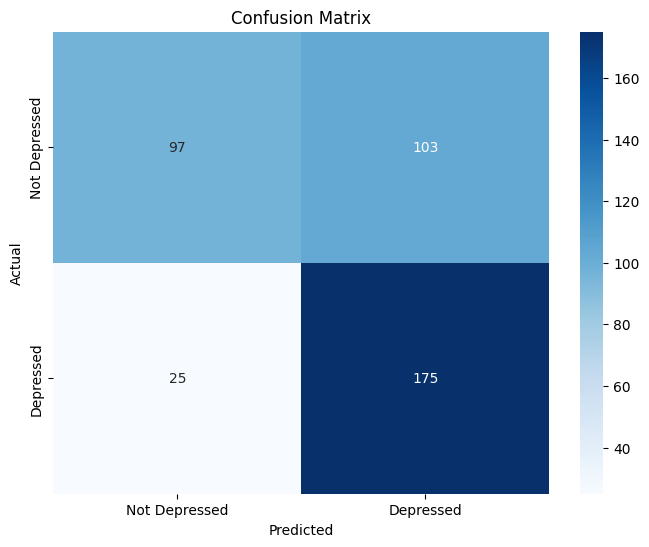

In [ ]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_rfc)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed', 'Depressed'], yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In regards to logistic regression, setting max_iter to 2000 here would be to limit the running algorithm to only iterate 2000 times before it stop (also termed as early stopping) , basically to save computational resources and also to reduce overfitting by reducing exposure to unnecessary noices in the features.

And fit would be called to train the model and finally predict is called to make prediction based on vectorized comments/tweets in the testing set.

Finally, calling classification_report() to render the evaluation report so that we could evaluate the model in terms of accuracy, precision, recall , F1-score and confusion matrix.



In [ ]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_tfidf, y_train)

#predictions and evaluation
y_pred_lr = model.predict(X_test_tfidf)
log_reg_report = classification_report(y_test, y_pred_lr)
print(log_reg_report)

              precision    recall  f1-score   support

           0       0.62      0.84      0.71       200
           1       0.75      0.48      0.59       200

    accuracy                           0.66       400
   macro avg       0.69      0.66      0.65       400
weighted avg       0.69      0.66      0.65       400



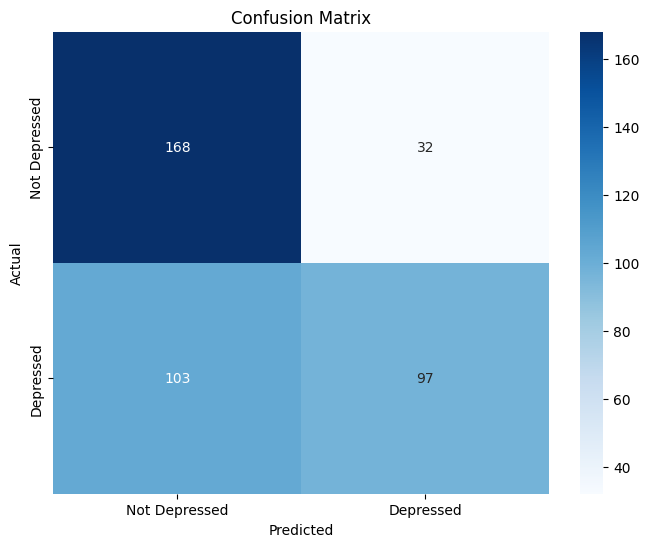

In [ ]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed', 'Depressed'], yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

And here, we attempt to create a custom model and define a function based on an ensemble method of model stacking (an interesting method whereby the estimators of the base models will each learn different features from the training set and combining the features to form meta-features which would be then given to the final estimator which would be the meta-model as input to make the final prediction )


In [ ]:

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


# Classifiers
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier,AdaBoostClassifier

import warnings
warnings.simplefilter('ignore')



def generate_custom_model():
    estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10)),
    ('knn',KNeighborsClassifier(n_neighbors=7)),
    ('svc', SVC(kernel='linear', C=1, random_state=42)),
    ('NB', GaussianNB()),
    ('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))
    ]
    model = StackingClassifier(
           estimators=estimators, final_estimator=LogisticRegression(max_iter=2000)
    )
    return model

Similar to the other RF and LR models mentioned , fit is called to train the custom model (referring to the stacking classifier ensemble model) by providing X, Y training set as input. Follow by saving the model to the models directory , loading the model to test it by also calling the predict method to make prediction based on X testing set which consists of the chinese social media comments .

Finally, calling classification report and also rendering the confusion matrix to perform model evaluation.

In [ ]:
from joblib import dump
from joblib import load

X_train_new = X_train_tfidf
X_test_new = X_test_tfidf

custom_model = generate_custom_model()

custom_model.fit(X_train_new, y_train)

dump(custom_model, os.path.join(directory_name, "stacking_classifier_model.pkl"))
ensemble_model = load(os.path.join(directory_name, "stacking_classifier_model.pkl"))

y_pred_cm = ensemble_model.predict(X_test_new)

custom_model_report = classification_report(y_test, y_pred_cm)
print(custom_model_report)

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       200
           1       0.72      0.74      0.73       200

    accuracy                           0.73       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.73      0.72      0.72       400



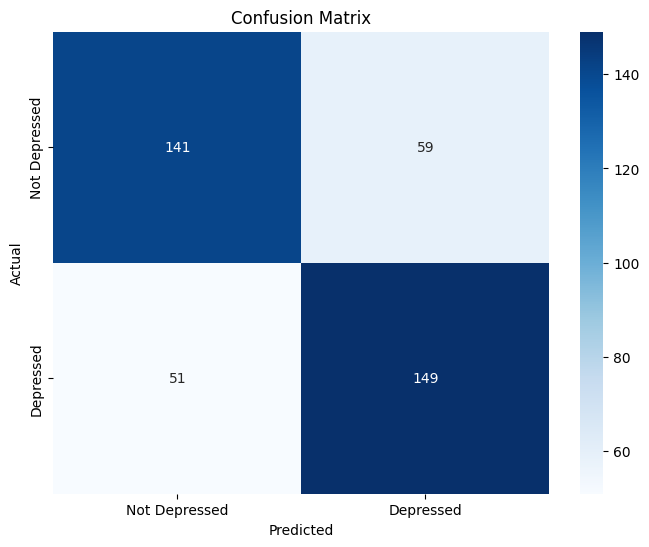

In [ ]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_cm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed', 'Depressed'], yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Finally, all 3 models will be compared by extracting the 3 metrics (precision, recall, f1-score) from the classification reports and basically plot them using a line chart .

Overall, the ensemble model seems to perform better than individual models in terms of stability or performance consistency . In other words, the 3 metrics for the stack ensemble model are typically balanced AND actually perform much better than LR and RF models over several run iterations.

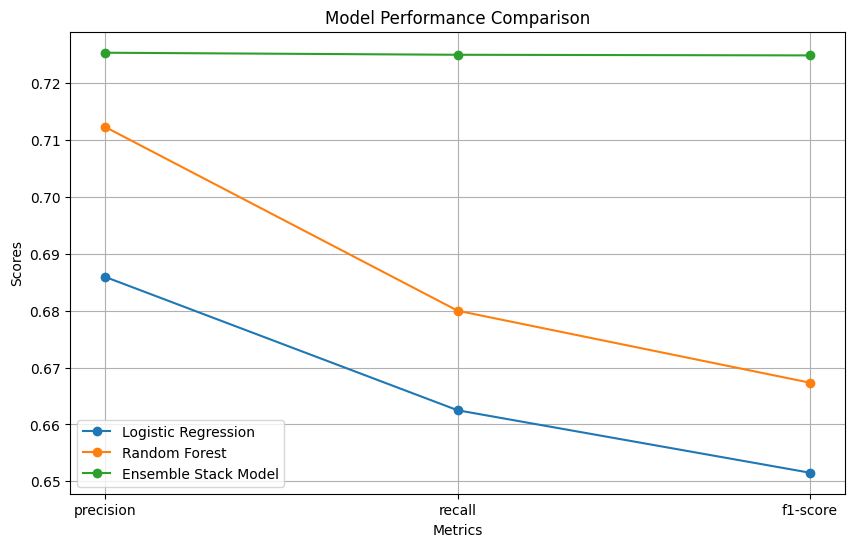

In [ ]:
#extracting metrics from classification reports
log_reg_report = classification_report(y_test, y_pred_lr, output_dict=True)
rf_report = classification_report(y_test, y_pred_rfc, output_dict=True)
custom_model_report = classification_report(y_test, y_pred_cm, output_dict=True)

#extracting metrics
metrics = ['precision', 'recall', 'f1-score']
log_reg_scores = [log_reg_report['macro avg'][metric] for metric in metrics]
rf_scores = [rf_report['macro avg'][metric] for metric in metrics]
custom_model_scores = [custom_model_report['macro avg'][metric] for metric in metrics]

#plotting the metrics
plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))

plt.plot(x, log_reg_scores, label='Logistic Regression', marker='o')
plt.plot(x, rf_scores, label='Random Forest', marker='o')
plt.plot(x, custom_model_scores, label='Ensemble Stack Model', marker='o')

plt.xticks(x, metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

## Deep Learning (Training & Evaluating)

In this section for deep learning, the focus is on training and evaluating BiLSTM (BiDirectional Long Short Term Memory) model and transformer (BERT) model.

With that being said, pytorch is chosen as the main python library to build these models.

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import precision_recall_fscore_support
from tqdm import tqdm
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout, Concatenate, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

SO, similar to the training of machine learning model, we first have to vectorize the comments/tweets in order to train the deep learning models.

Thus, we make a copy of sampling_df. Running a tokenizer to train on the comments and tweets in the dataframe in order to determine appearance frequencies while also initialize the vocabulary size (referring to the unique count of word detected in the tweets / comments).

In [ ]:
sampling_df_new = sampling_df.copy()

#tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sampling_df_new['cleanTweet'])
vocab_size = len(tokenizer.word_index) + 1

Here, we basically define sequenced_text in sampling_df to store the vectorized or sequenced comments / tweets .

In [ ]:
#convert text to sequences
sampling_df_new['sequenced_text'] = tokenizer.texts_to_sequences(sampling_df_new['cleanTweet'])
sampling_df_new.head(10)

,Tweet,Depressed,emojilessTweet,noiselessTweet,cleanTweet,sequenced_text
0,#回家大作战#红包在手，好运我有！我刚刚抽到了秒钱官微 的现金红包！你也快来试试手气吧，比比...,0,#回家大作战#红包在手，好运我有！我刚刚抽到了秒钱官微 的现金红包！你也快来试试手气吧，比比...,回家大作战红包在手好运我有我刚刚抽到了秒钱官微的现金红包你也快来试试手气吧比比谁抢得多秒钱官...,回 家 大 作战 红包 手 好运 刚刚 抽 秒 钱 官微 现金 红包 快 试试 手气 抢 秒...,"[65, 12, 16, 3743, 82, 194, 938, 195, 250, 74,..."
1,老师提问 你的目标是什么 好巧不巧喊到我 我真的真的就想活下去就好了 天天在怎么活怎么死徘徊...,1,老师提问 你的目标是什么 好巧不巧喊到我 我真的真的就想活下去就好了 天天在怎么活怎么死徘徊...,老师提问你的目标是什么好巧不巧喊到我我真的真的就想活下去就好了天天在怎么活怎么死徘徊啊是很好...,老师 提问 目标 什 好 巧 不 巧 喊 真 真 想 活 好 天天 活 死 徘徊 很 好笑 ...,"[277, 3744, 301, 39, 2, 2271, 1, 2271, 506, 11..."
2,白医生❤️本人发了一个快手作品，一起来看！#记录世界 记录你# 白医生❤️本人的快手视频,0,白医生:红心:本人发了一个快手作品，一起来看！#记录世界 记录你# 白医生:红心:本人的快手视频,白医生红心本人发了一个快手作品一起来看记录世界记录你白医生红心本人的快手视频,白 医生 红心 本人 发 一个 快手 作品 看 记录 世界 记录 白 医生 红心 本人 快手 视频,"[508, 333, 448, 772, 98, 7, 138, 589, 13, 91, ..."
3,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,1,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,想 摔 东西 摔 手机 摔包 摔 碗 摔 暴躁 源于 无能 满 口 满心 都 尖锐 刺 场 ...,"[5, 666, 83, 666, 131, 3746, 666, 941, 666, 15..."
4,古来官者皆淹没，唯有书者留其名。(纪念一下我这个不是很喜欢看书的小伙今天终于看完了《红楼梦》),0,古来官者皆淹没，唯有书者留其名。(纪念一下我这个不是很喜欢看书的小伙今天终于看完了《红楼梦》),古来官者皆淹没唯有书者留其名纪念一下我这个不是很喜欢看书的小伙今天终于看完了红楼梦,古 官者 皆 淹没 唯有 书者 留 名 纪念 不 很 喜欢 看 书 小伙 终于 看 完 红楼梦,"[1187, 3750, 942, 2274, 773, 3751, 251, 223, 7..."
5,抑郁症在有趣的时间醒来。,1,抑郁症在有趣的时间醒来。,抑郁症在有趣的时间醒来,抑郁症 有趣 时间 醒,"[44, 334, 77, 102]"
6,🍪 实体店🍪 ①梅露露实力柔软踩在云朵上 掉了一个鞋搭 难受②海产类柄图无敌适合夏天了 蓝色...,1,:饼干: 实体店:饼干: ①梅露露实力柔软踩在云朵上 掉了一个鞋搭 难受②海产类柄图无敌适合...,饼干实体店饼干梅露露实力柔软踩在云朵上掉了一个鞋搭难受海产类柄图无敌适合夏天了蓝色真的清凉又...,饼干 实体 店 饼干 梅露露 实力 柔软 踩 云朵 上 掉 一个 鞋 搭 难 受 海产 类 ...,"[1188, 3753, 1189, 1188, 3754, 944, 1190, 945,..."
7,酒入愁肠愁更长，心已成伤何惧伤？？？,1,酒入愁肠愁更长，心已成伤何惧伤？？？,酒入愁肠愁更长心已成伤何惧伤,酒入 愁 肠 愁 更 长心 已 成 伤何 惧伤,"[3767, 2278, 3768, 2278, 36, 3769, 162, 107, 3..."
8,#杨幂的红包#Boomshakalaka！我在杨幂 的红包中抽到了@聚美陈欧 提供的“聚美百...,0,#杨幂的红包#Boomshakalaka！我在杨幂 的红包中抽到了@聚美陈欧 提供的“聚美百...,杨幂的红包我在杨幂的红包中抽到了聚美陈欧提供的聚美百元礼包年的小惊喜也许你的惊喜更大哦杨幂的红包,杨幂 红包 杨幂 红包 中 抽 聚美 陈欧 提供 聚美百 元 礼包 年 小 惊喜 许 惊喜 ...,"[946, 82, 946, 82, 47, 250, 2279, 2280, 302, 2..."
9,好事天天有，今天特别多！ 网页链接,0,好事天天有，今天特别多！ 网页链接,好事天天有今天特别多网页链接,好事 天天 特别 网页链 接,"[947, 507, 108, 73, 37]"


In order to train deep learning models, we made sure to insert paddings of 0s to each sequenced comments/tweets to make sure that each sequenced data have equal length or shape due to deep learning models are better at recognizing pattern in sequential data and often require that the inputs are of equal shapes.

In this case, we ensure that each sequenced data are shaped at 100 in length.

In [ ]:
#pad the sequences
max_len = 100
sampling_df_new['sequenced_text'] = pad_sequences(sampling_df_new['sequenced_text'], maxlen=max_len, padding='post').tolist()

sampling_df_new.head(10)

,Tweet,Depressed,emojilessTweet,noiselessTweet,cleanTweet,sequenced_text
0,#回家大作战#红包在手，好运我有！我刚刚抽到了秒钱官微 的现金红包！你也快来试试手气吧，比比...,0,#回家大作战#红包在手，好运我有！我刚刚抽到了秒钱官微 的现金红包！你也快来试试手气吧，比比...,回家大作战红包在手好运我有我刚刚抽到了秒钱官微的现金红包你也快来试试手气吧比比谁抢得多秒钱官...,回 家 大 作战 红包 手 好运 刚刚 抽 秒 钱 官微 现金 红包 快 试试 手气 抢 秒...,"[65, 12, 16, 3743, 82, 194, 938, 195, 250, 74,..."
1,老师提问 你的目标是什么 好巧不巧喊到我 我真的真的就想活下去就好了 天天在怎么活怎么死徘徊...,1,老师提问 你的目标是什么 好巧不巧喊到我 我真的真的就想活下去就好了 天天在怎么活怎么死徘徊...,老师提问你的目标是什么好巧不巧喊到我我真的真的就想活下去就好了天天在怎么活怎么死徘徊啊是很好...,老师 提问 目标 什 好 巧 不 巧 喊 真 真 想 活 好 天天 活 死 徘徊 很 好笑 ...,"[277, 3744, 301, 39, 2, 2271, 1, 2271, 506, 11..."
2,白医生❤️本人发了一个快手作品，一起来看！#记录世界 记录你# 白医生❤️本人的快手视频,0,白医生:红心:本人发了一个快手作品，一起来看！#记录世界 记录你# 白医生:红心:本人的快手视频,白医生红心本人发了一个快手作品一起来看记录世界记录你白医生红心本人的快手视频,白 医生 红心 本人 发 一个 快手 作品 看 记录 世界 记录 白 医生 红心 本人 快手 视频,"[508, 333, 448, 772, 98, 7, 138, 589, 13, 91, ..."
3,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,1,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,想 摔 东西 摔 手机 摔包 摔 碗 摔 暴躁 源于 无能 满 口 满心 都 尖锐 刺 场 ...,"[5, 666, 83, 666, 131, 3746, 666, 941, 666, 15..."
4,古来官者皆淹没，唯有书者留其名。(纪念一下我这个不是很喜欢看书的小伙今天终于看完了《红楼梦》),0,古来官者皆淹没，唯有书者留其名。(纪念一下我这个不是很喜欢看书的小伙今天终于看完了《红楼梦》),古来官者皆淹没唯有书者留其名纪念一下我这个不是很喜欢看书的小伙今天终于看完了红楼梦,古 官者 皆 淹没 唯有 书者 留 名 纪念 不 很 喜欢 看 书 小伙 终于 看 完 红楼梦,"[1187, 3750, 942, 2274, 773, 3751, 251, 223, 7..."
5,抑郁症在有趣的时间醒来。,1,抑郁症在有趣的时间醒来。,抑郁症在有趣的时间醒来,抑郁症 有趣 时间 醒,"[44, 334, 77, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,🍪 实体店🍪 ①梅露露实力柔软踩在云朵上 掉了一个鞋搭 难受②海产类柄图无敌适合夏天了 蓝色...,1,:饼干: 实体店:饼干: ①梅露露实力柔软踩在云朵上 掉了一个鞋搭 难受②海产类柄图无敌适合...,饼干实体店饼干梅露露实力柔软踩在云朵上掉了一个鞋搭难受海产类柄图无敌适合夏天了蓝色真的清凉又...,饼干 实体 店 饼干 梅露露 实力 柔软 踩 云朵 上 掉 一个 鞋 搭 难 受 海产 类 ...,"[1188, 3753, 1189, 1188, 3754, 944, 1190, 945,..."
7,酒入愁肠愁更长，心已成伤何惧伤？？？,1,酒入愁肠愁更长，心已成伤何惧伤？？？,酒入愁肠愁更长心已成伤何惧伤,酒入 愁 肠 愁 更 长心 已 成 伤何 惧伤,"[3767, 2278, 3768, 2278, 36, 3769, 162, 107, 3..."
8,#杨幂的红包#Boomshakalaka！我在杨幂 的红包中抽到了@聚美陈欧 提供的“聚美百...,0,#杨幂的红包#Boomshakalaka！我在杨幂 的红包中抽到了@聚美陈欧 提供的“聚美百...,杨幂的红包我在杨幂的红包中抽到了聚美陈欧提供的聚美百元礼包年的小惊喜也许你的惊喜更大哦杨幂的红包,杨幂 红包 杨幂 红包 中 抽 聚美 陈欧 提供 聚美百 元 礼包 年 小 惊喜 许 惊喜 ...,"[946, 82, 946, 82, 47, 250, 2279, 2280, 302, 2..."
9,好事天天有，今天特别多！ 网页链接,0,好事天天有，今天特别多！ 网页链接,好事天天有今天特别多网页链接,好事 天天 特别 网页链 接,"[947, 507, 108, 73, 37, 0, 0, 0, 0, 0, 0, 0, 0..."


Also, similar to the approach being used in the previous section for machine learning , we compute the sentiment score for each tweets and comments in cleanTweet by aggregating the number of keywords appearance based on the depression_point of the defined lexicon.

Next, we concatenate the sequenced comments/ tweets and the sentiment score to combine the features to form the input for the deep learning models.



In [ ]:
def get_sentiment_score(word, lexicon_df):
    score_row = lexicon_df.loc[lexicon_df['context'] == word, 'depression_point']
    if not score_row.empty:
        return score_row.values[0]
    else:
        return 0

def compute_sentiment_score(X_sample, lexicon_df):
    words = X_sample.split()
    sentiment_score = sum([get_sentiment_score(word, lexicon_df) for word in words])
    return sentiment_score

sampling_df_new['sentiment_score'] = sampling_df_new['cleanTweet'].apply(lambda X_sample: compute_sentiment_score(X_sample, lexicon_df))

sequenced_text = np.array(sampling_df_new['sequenced_text'].tolist())
sentiment_score = np.array(sampling_df_new['sentiment_score']).reshape(-1, 1)

combined_features = np.hstack((sequenced_text, sentiment_score))

# Add the combined features back to the DataFrame
sampling_df_new['combined_features'] = combined_features.tolist()

sampling_df_new.head(10)

,Tweet,Depressed,emojilessTweet,noiselessTweet,cleanTweet,sequenced_text,sentiment_score,combined_features
0,#回家大作战#红包在手，好运我有！我刚刚抽到了秒钱官微 的现金红包！你也快来试试手气吧，比比...,0,#回家大作战#红包在手，好运我有！我刚刚抽到了秒钱官微 的现金红包！你也快来试试手气吧，比比...,回家大作战红包在手好运我有我刚刚抽到了秒钱官微的现金红包你也快来试试手气吧比比谁抢得多秒钱官...,回 家 大 作战 红包 手 好运 刚刚 抽 秒 钱 官微 现金 红包 快 试试 手气 抢 秒...,"[65, 12, 16, 3743, 82, 194, 938, 195, 250, 74,...",0,"[65, 12, 16, 3743, 82, 194, 938, 195, 250, 74,..."
1,老师提问 你的目标是什么 好巧不巧喊到我 我真的真的就想活下去就好了 天天在怎么活怎么死徘徊...,1,老师提问 你的目标是什么 好巧不巧喊到我 我真的真的就想活下去就好了 天天在怎么活怎么死徘徊...,老师提问你的目标是什么好巧不巧喊到我我真的真的就想活下去就好了天天在怎么活怎么死徘徊啊是很好...,老师 提问 目标 什 好 巧 不 巧 喊 真 真 想 活 好 天天 活 死 徘徊 很 好笑 ...,"[277, 3744, 301, 39, 2, 2271, 1, 2271, 506, 11...",0,"[277, 3744, 301, 39, 2, 2271, 1, 2271, 506, 11..."
2,白医生❤️本人发了一个快手作品，一起来看！#记录世界 记录你# 白医生❤️本人的快手视频,0,白医生:红心:本人发了一个快手作品，一起来看！#记录世界 记录你# 白医生:红心:本人的快手视频,白医生红心本人发了一个快手作品一起来看记录世界记录你白医生红心本人的快手视频,白 医生 红心 本人 发 一个 快手 作品 看 记录 世界 记录 白 医生 红心 本人 快手 视频,"[508, 333, 448, 772, 98, 7, 138, 589, 13, 91, ...",0,"[508, 333, 448, 772, 98, 7, 138, 589, 13, 91, ..."
3,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,1,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,想摔东西摔手机摔包摔碗摔一切我的暴躁源于我的无能满口满心都是尖锐的刺这场自救的仗我不想打了,想 摔 东西 摔 手机 摔包 摔 碗 摔 暴躁 源于 无能 满 口 满心 都 尖锐 刺 场 ...,"[5, 666, 83, 666, 131, 3746, 666, 941, 666, 15...",1,"[5, 666, 83, 666, 131, 3746, 666, 941, 666, 15..."
4,古来官者皆淹没，唯有书者留其名。(纪念一下我这个不是很喜欢看书的小伙今天终于看完了《红楼梦》),0,古来官者皆淹没，唯有书者留其名。(纪念一下我这个不是很喜欢看书的小伙今天终于看完了《红楼梦》),古来官者皆淹没唯有书者留其名纪念一下我这个不是很喜欢看书的小伙今天终于看完了红楼梦,古 官者 皆 淹没 唯有 书者 留 名 纪念 不 很 喜欢 看 书 小伙 终于 看 完 红楼梦,"[1187, 3750, 942, 2274, 773, 3751, 251, 223, 7...",0,"[1187, 3750, 942, 2274, 773, 3751, 251, 223, 7..."
5,抑郁症在有趣的时间醒来。,1,抑郁症在有趣的时间醒来。,抑郁症在有趣的时间醒来,抑郁症 有趣 时间 醒,"[44, 334, 77, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[44, 334, 77, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,🍪 实体店🍪 ①梅露露实力柔软踩在云朵上 掉了一个鞋搭 难受②海产类柄图无敌适合夏天了 蓝色...,1,:饼干: 实体店:饼干: ①梅露露实力柔软踩在云朵上 掉了一个鞋搭 难受②海产类柄图无敌适合...,饼干实体店饼干梅露露实力柔软踩在云朵上掉了一个鞋搭难受海产类柄图无敌适合夏天了蓝色真的清凉又...,饼干 实体 店 饼干 梅露露 实力 柔软 踩 云朵 上 掉 一个 鞋 搭 难 受 海产 类 ...,"[1188, 3753, 1189, 1188, 3754, 944, 1190, 945,...",0,"[1188, 3753, 1189, 1188, 3754, 944, 1190, 945,..."
7,酒入愁肠愁更长，心已成伤何惧伤？？？,1,酒入愁肠愁更长，心已成伤何惧伤？？？,酒入愁肠愁更长心已成伤何惧伤,酒入 愁 肠 愁 更 长心 已 成 伤何 惧伤,"[3767, 2278, 3768, 2278, 36, 3769, 162, 107, 3...",0,"[3767, 2278, 3768, 2278, 36, 3769, 162, 107, 3..."
8,#杨幂的红包#Boomshakalaka！我在杨幂 的红包中抽到了@聚美陈欧 提供的“聚美百...,0,#杨幂的红包#Boomshakalaka！我在杨幂 的红包中抽到了@聚美陈欧 提供的“聚美百...,杨幂的红包我在杨幂的红包中抽到了聚美陈欧提供的聚美百元礼包年的小惊喜也许你的惊喜更大哦杨幂的红包,杨幂 红包 杨幂 红包 中 抽 聚美 陈欧 提供 聚美百 元 礼包 年 小 惊喜 许 惊喜 ...,"[946, 82, 946, 82, 47, 250, 2279, 2280, 302, 2...",0,"[946, 82, 946, 82, 47, 250, 2279, 2280, 302, 2..."
9,好事天天有，今天特别多！ 网页链接,0,好事天天有，今天特别多！ 网页链接,好事天天有今天特别多网页链接,好事 天天 特别 网页链 接,"[947, 507, 108, 73, 37, 0, 0, 0, 0, 0, 0, 0, 0...",0,"[947, 507, 108, 73, 37, 0, 0, 0, 0, 0, 0, 0, 0..."


Define TweetDataset class to help with converting sequenced data to PyTorch tensors in order for Torch deep learning models to work with the data for training purposes.

A torch tensors will consists of data , text and label.

In [ ]:
#convert data to PyTorch tensors
class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = torch.tensor(self.texts[idx], dtype=torch.long)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return text, label

As always, splitting the features dataset into training sets and testing sets with distribution of 80% and 20% respectively.

In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(
    sampling_df_new['combined_features'], sampling_df_new['Depressed'], test_size=0.2, random_state=42
)

Here, we define and intialize dataloaders to convert the datasets into batches and in this case, batch size of 32 in order to control and manage the computational resource when using the training or testing datasets for training deep learning models since it is generally resource intensive or expensive to train the entire dataset all at once due to datasets may have large amount of features or neurons .

In [ ]:
#create DataLoader
batch_size = 32

train_dataset = TweetDataset(X_train.tolist(), y_train.tolist())
test_dataset = TweetDataset(X_test.tolist(), y_test.tolist())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In regards to the Bidirectional - LSTM model, we define here the specifications consisting of 4 layers



1.   **first layer - embedding layer** (Basically converting vectors into model readable dense format.)
2.   **second layer - bilstm layer** (Basically to detect important features in generally long sequential data - output from first layer by scanning left and right direction in parallel to cover more grounds and store the context or important feature in memory cells. Also concatination of the features. )
3.   **third layer - linear layer** (Basically taking the features from the second layer to compute weighted sums of the inputs.)
4.   **fourth layer - sigmoid layer** (Basically to take the output of the third layer as input and apply sigmoid function to ensure non-linearity by converting the results of the third layers to value between 0 and 1 .)

So, how it works is that for each layer in the neural network, the next layer will take the output of previous layers as input during the forward pass.





In [ ]:
import torch.optim as optim


class Enhanced_RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, rnn_units, lstm_units, gru_units, output_size, num_layers=1):
        super(Enhanced_RNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        #self.rnn = nn.RNN(embedding_dim, rnn_units, num_layers=num_layers, batch_first=True)
        self.bilstm = nn.LSTM(embedding_dim, lstm_units, num_layers=num_layers,
                            bidirectional=True, batch_first=True)
        #self.gru = nn.GRU(lstm_units * 2, gru_units, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(lstm_units * 2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        #rnn_out, _ = self.rnn(x)
        bilstm_out, _ = self.bilstm(x)
        #gru_out, _ = self.gru(bilstm_out)
        # Take the output from the last time step
        bilstm_out = bilstm_out[:, -1, :]
        out = self.fc(bilstm_out)
        out = self.sigmoid(out)
        return out

After defining the model, we



1.   initialize the model
2.   intialize the criterion (also termed as loss function, the metrics to use for calculating loss)
3.   initialize the optimizer (basically to update and adjust weights in a neural network in accordance of the loss computation between the network predicted values and actual target values )



In [ ]:
#parameters
embed_size = 128
hidden_size = 128
output_size = 2
num_layers = 2
learning_rate = 0.001
num_epochs = 20
lstm_units = 256
rnn_units = 128
gru_units = 256

#initialize model, loss function, and optimizer
model = Enhanced_RNN(vocab_size, embed_size, rnn_units, lstm_units, gru_units, output_size, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

The train_model function is defined in order to train the biLSTM model basically repeat the iteration (based on number of epochs) of


**Forward Pass**
1.   predicting the labels value (pred) based on the training set (referring to the training loader)
2.   initializing loss function

**Backward Pass & Optimization**
3.   reset the gradient to 0 to prevent accumulation of gradient to reduce the risk of model overfitting by not over-influencing the next iteration to past gradients and also to prevent the gradient becoming too huge.
4.  calculating loss by comparing the differences of pred labels vs actual target labels and initiate backward propagation. Also storing the gradient.
5.  optimizer will update and adjust the weights in accordance to the loss computation (referring to the gradients) from the criterion.

In [ ]:
#training function
def train_model(model, train_loader, criterion, optimizer, num_epochs, device):
    model.train()
    for epoch in range(num_epochs):
        for texts, labels in tqdm(train_loader):
            texts, labels = texts.to(device), labels.to(device)

            #forward pass
            outputs = model(texts)
            loss = criterion(outputs, labels)

            #backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

The evaluate_model function is defined to evaluate the biLSTM model by first predicting the labels of the testing set (referring to the test loader) and basically extracting the metrics (accuracy, recall, F1-score) to plot a bar chart to compare the metrics.

In [ ]:
#evaluation function
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for texts, labels in test_loader:
            texts, labels = texts.to(device), labels.to(device)
            outputs = model(texts)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    accuracy = accuracy_score(all_labels, all_preds)

    print("RNN Classification Report:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    #visualization
    metrics = ['Accuracy', 'Recall', 'F1-Score']
    scores = [accuracy, recall, f1]

    plt.figure(figsize=(8, 5))
    plt.bar(metrics, scores, color=['blue', 'green', 'red'])
    plt.ylim(0, 1)
    plt.ylabel('Scores')
    plt.title('Performance Metrics for RNN Model')
    for i, v in enumerate(scores):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
    plt.show()

Setting the device configuration to either make use of the **GPU** (which perform significantly well compare to cpu) if available else setting the device to **cpu**

In [ ]:
#setting device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Training the biLSTM model and save the model for later used if required.

In [ ]:
#training the model
train_model(model, train_loader, criterion, optimizer, num_epochs, device)

import torch
torch.save(model.state_dict(), os.path.join(directory_name, "enhanced_bilstm_model.pth"))

100%|██████████| 50/50 [01:04<00:00,  1.30s/it]


Epoch [1/20], Loss: 0.5916


100%|██████████| 50/50 [01:04<00:00,  1.28s/it]


Epoch [2/20], Loss: 0.5895


100%|██████████| 50/50 [01:04<00:00,  1.28s/it]


Epoch [3/20], Loss: 0.7144


100%|██████████| 50/50 [01:06<00:00,  1.32s/it]


Epoch [4/20], Loss: 0.5703


100%|██████████| 50/50 [01:04<00:00,  1.29s/it]


Epoch [5/20], Loss: 0.5596


100%|██████████| 50/50 [01:04<00:00,  1.30s/it]


Epoch [6/20], Loss: 0.5861


100%|██████████| 50/50 [01:09<00:00,  1.39s/it]


Epoch [7/20], Loss: 0.6625


100%|██████████| 50/50 [01:04<00:00,  1.29s/it]


Epoch [8/20], Loss: 0.7012


100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


Epoch [9/20], Loss: 0.6407


100%|██████████| 50/50 [01:05<00:00,  1.32s/it]


Epoch [10/20], Loss: 0.6537


100%|██████████| 50/50 [01:03<00:00,  1.27s/it]


Epoch [11/20], Loss: 0.5984


100%|██████████| 50/50 [01:03<00:00,  1.28s/it]


Epoch [12/20], Loss: 0.5572


100%|██████████| 50/50 [01:04<00:00,  1.29s/it]


Epoch [13/20], Loss: 0.6409


100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch [14/20], Loss: 0.5474


100%|██████████| 50/50 [01:03<00:00,  1.28s/it]


Epoch [15/20], Loss: 0.4921


100%|██████████| 50/50 [01:27<00:00,  1.76s/it]


Epoch [16/20], Loss: 0.5560


100%|██████████| 50/50 [01:22<00:00,  1.66s/it]


Epoch [17/20], Loss: 0.5201


100%|██████████| 50/50 [01:31<00:00,  1.84s/it]


Epoch [18/20], Loss: 0.3924


100%|██████████| 50/50 [01:35<00:00,  1.91s/it]


Epoch [19/20], Loss: 0.4216


100%|██████████| 50/50 [01:29<00:00,  1.79s/it]

Epoch [20/20], Loss: 0.4384


Test the loading of biLSTM model and evaluate model performance.





RNN Classification Report:
Accuracy: 0.6825
Recall: 0.6825
F1-Score: 0.6814


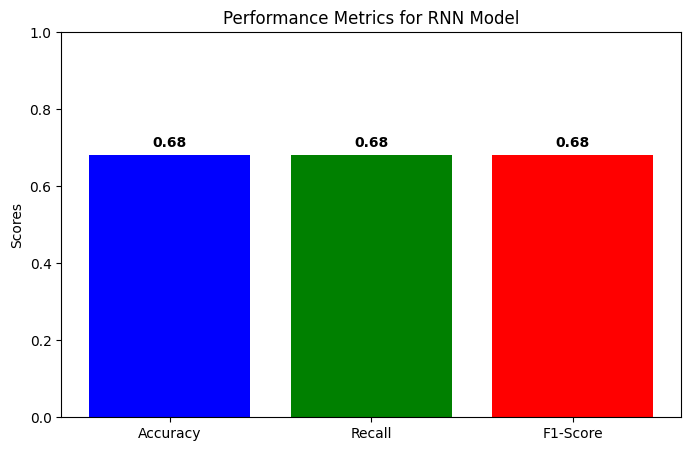

In [ ]:
bilstm_model = Enhanced_RNN(vocab_size, embed_size, rnn_units, lstm_units, gru_units, output_size, num_layers)
bilstm_model.load_state_dict(torch.load(os.path.join(directory_name, "enhanced_bilstm_model.pth")))

#evaluating
evaluate_model(bilstm_model, test_loader, device)

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

Similar to TweetDataset mentioned above, TweetDatasetBERT is basically doing the same thing except that here BERT tokenizer is being used to encode the data (also includes tokenization and padding) to form torch tensors  consisting of flatten input_ids, flatten attention_mask and labels.

In [ ]:
#tokenization and padding using BERT Tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')

class TweetDatasetBERT(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer_bert.encode_plus(
            self.texts[idx],
            add_special_tokens=True,
            max_length=100,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

As usual, the dataset is being split into 80% training set and 20% testing set.


In [ ]:
#splitting the data
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(
    sampling_df_new['combined_features'].tolist(), sampling_df_new['Depressed'].tolist(), test_size=0.2, random_state=42
)

Basically converting the dataset to torch tensors and load them into dataloaders with batch size of 16, the reason behind this is similar to the reason mentioned above for biLSTM model.

In [ ]:
#DataLoader
batch_size_bert = 16

train_dataset_bert = TweetDatasetBERT(X_train_bert, y_train_bert)
test_dataset_bert = TweetDatasetBERT(X_test_bert, y_test_bert)

train_loader_bert = DataLoader(train_dataset_bert, batch_size=batch_size_bert, shuffle=True)
test_loader_bert = DataLoader(test_dataset_bert, batch_size=batch_size_bert, shuffle=False)

Initializing the BERT transformer model and the rest is basically setting up and configuring the BERT model to utilize cuda if available else utilizing the cpu to train the BERT model.

In [ ]:
#defining the BERT model
model_bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
device_bert = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_bert = model_bert.to(device_bert)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Setting up the optimizer for BERT model.

In [ ]:
#optimizer
optimizer_bert = AdamW(model_bert.parameters(), lr=2e-5)

Defining BERT transformer training function which in a way very similar to biLSTM model training approach . Methods include :    

Iterate the below steps using training set based on the number of epochs

**Forward Pass**

1.   reset the gradient to 0 via the optimizer.
2.   predicting the output with BERT model by providing the input_ids and attention_mask.
3.   initialize loss function which in this case would be a cross_entropy (mainly for classification problem) by providing the logits (termed as raw and unnormalized) for the prediction outcome and the actual target labels.

**Backward propagation**

4.  calling loss.backward() to compute loss and initiate backward propagation while keeping track of the gradients.
5. optimizer will step forward to adjust and update the weights in the neural network based on the gradients captured in step 4 in order for the network to come to the right prediction or conclusion.



In [ ]:
import torch.nn.functional as F

#training function
def train_model_bert(model_bert, train_loader_bert, optimizer_bert, device_bert, num_epochs=3):
    model_bert.train()
    for epoch in range(num_epochs):
        for batch in tqdm(train_loader_bert, desc=f'Epoch {epoch+1}'):
            optimizer_bert.zero_grad()
            input_ids = batch['input_ids'].to(device_bert)
            attention_mask = batch['attention_mask'].to(device_bert)
            labels = batch['labels'].to(device_bert)
            # Handle out-of-vocabulary tokens
            input_ids = torch.clamp(input_ids, max=tokenizer_bert.vocab_size - 1)
            outputs = model_bert(input_ids, attention_mask=attention_mask)
            # Calculate loss using outputs.logits and labels
            loss = F.cross_entropy(outputs.logits, labels)
            loss.backward()
            optimizer_bert.step()
        print(f'Epoch {epoch+1} completed. Loss: {loss.item():.4f}')

evaluate_model_bert defines the function to evaluate the BERT model by first predicting the outcome, and extracting the accuracy, recall, F1-score from the predictions to render a bar chart to compare the metrics.

In [ ]:
#evaluation function
def evaluate_model_bert(model_bert, test_loader_bert, device_bert):
    model_bert.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader_bert:
            input_ids = batch['input_ids'].to(device_bert)
            attention_mask = batch['attention_mask'].to(device_bert)
            labels = batch['labels'].to(device_bert)
            outputs = model_bert(input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy_bert = accuracy_score(all_labels, all_preds)
    recall_bert = recall_score(all_labels, all_preds, average='weighted')
    f1_bert = f1_score(all_labels, all_preds, average='weighted')

    print("BERT Classification Report:")
    print(f"Accuracy: {accuracy_bert:.4f}")
    print(f"Recall: {recall_bert:.4f}")
    print(f"F1-Score: {f1_bert:.4f}")

    #visualization
    metrics_bert = ['Accuracy', 'Recall', 'F1-Score']
    scores_bert = [accuracy_bert, recall_bert, f1_bert]

    plt.figure(figsize=(8, 5))
    plt.bar(metrics_bert, scores_bert, color=['blue', 'green', 'red'])
    plt.ylim(0, 1)
    plt.ylabel('Scores')
    plt.title('Performance Metrics for BERT Model')
    for i, v in enumerate(scores_bert):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
    plt.show()

Training the model with BERT model, loader for training set, AdamW optimizer, device and num of epochs = 3 as input . Due to the resource intensive process of training a BERT model, and also limited resource in google collab platform, the number of epochs is limited to 3 as each run requires around 25 - 30 mins which take quite a lot of time. **(using CPU, unfortunately it crashes for GPU run though not sure why)**

In [ ]:
#training the model
train_model_bert(model_bert, train_loader_bert, optimizer_bert, device_bert, num_epochs=3)

Epoch 1: 100%|██████████| 100/100 [30:02<00:00, 18.02s/it]


Epoch 1 completed. Loss: 0.6571


Epoch 2: 100%|██████████| 100/100 [25:59<00:00, 15.59s/it]


Epoch 2 completed. Loss: 0.6710


Epoch 3: 100%|██████████| 100/100 [25:53<00:00, 15.53s/it]

Epoch 3 completed. Loss: 0.5926


Finally, evaluating the BERT model . At least, from current observation, biLSTM actually perform better than BERT model, so BERT model probably have to be further fine-tuned but due to limited resources, BERT model cannot reach its potential since it is very resource intensive and not quite suitable for the task or use case at hand.

BERT Classification Report:
Accuracy: 0.5900
Recall: 0.5900
F1-Score: 0.5763


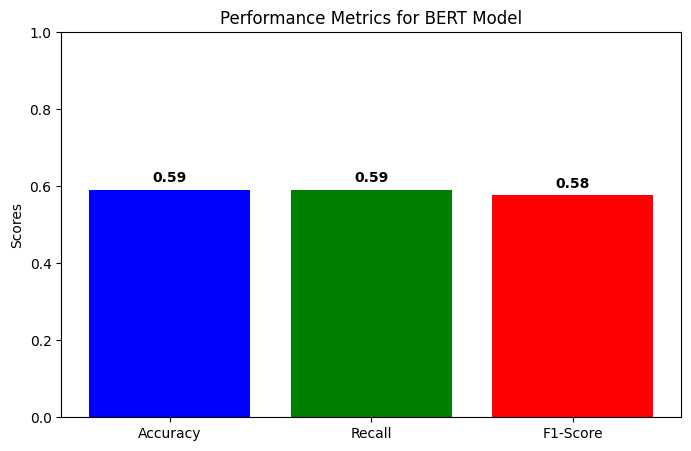

In [ ]:
#evaluate model
evaluate_model_bert(model_bert, test_loader_bert, device_bert)

## Prototype


To summarize , ensemble stack model is chosen for this prototype as it perform far better than RF / LR / biLSTM / BERT in this specific scenario in terms of accuracy, pricision, recall and F1-score and also stability (referring to the consistency of performance even after  several iterations of trainings).

This prototype will demonstrate the use of loaded ensemble stack model to predict 10 new chinese comments which is not in any of the dataset as it is randomly generated .

Based on observations below, out of 10 comments, 2 were wrong so it work as intended though the accuracy can still be improved in several ways.

** Note that in order for the prototype to work, please run section for data preprocessing and machine learning **

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump
from joblib import load
import thulac #https://github.com/thunlp/THULAC-Python
import emoji
import nltk
import pandas as pd
import csv
import re
import pandas as pd
import numpy as np
import pandas as pd
import os



def remove_stopwords(tweet, chinese_tokenizer, stopwords):
  tweet = chinese_tokenizer.cut(tweet, text=True)
  features = tweet.split(" ")
  tweet = " ".join([word for word in features if word not in stopwords])
  return tweet

def remove_noice(tweet):
     tweet = re.sub(r"[^\u4e00-\u9fff]","", tweet.strip())
     return tweet.replace(" ","")

def replace_emoji(tweet):
  emoji_list = emoji.distinct_emoji_list(tweet)

  def translate_emoji(emoji_icon):
    first_token = next(emoji.analyze(emoji_icon))
    return first_token.value.data['zh'] if first_token else ""

  for emoji_icon in emoji_list:
    tweet = tweet.replace(emoji_icon, translate_emoji(emoji_icon))
  return tweet

def get_sentiment_score(word, lexicon_df):
    score_row = lexicon_df.loc[lexicon_df['context'] == word, 'depression_point']
    if not score_row.empty:
        return score_row.values[0]
    else:
        return 0

def compute_sentiment_score(comment, lexicon_df):
    words = comment.split()
    sentiment_score = sum([get_sentiment_score(word, lexicon_df) for word in words])
    return sentiment_score


def pipeline(comment, lexicon_df, tfidf_vectorizer, model, chinese_tokenizer, stopwords):
    comment = replace_emoji(comment)
    comment = remove_noice(comment)
    comment = remove_stopwords(comment, chinese_tokenizer, stopwords)
    sentiment_score = compute_sentiment_score(comment, lexicon_df)
    tfidf_vector = tfidf_vectorizer.transform([comment]).toarray()
    combined_features = np.hstack((tfidf_vector, np.array([[sentiment_score]])))
    depression_state = model.predict(combined_features)

    return depression_state


if __name__ == "__main__":

    lexicon_df = pd.read_csv("/content/DepressionDetectionDataset_Chinese/depressionLexiconNew.csv", encoding="utf-8")
    depressed_lexicon_keywords = lexicon_df[lexicon_df['depression_point'] == 1]['context'].tolist()
    healthy_lexicon_keywords = lexicon_df[lexicon_df['depression_point'] == 0]['context'].tolist()

    nltk.download('stopwords')
    from nltk.corpus import stopwords

    stopwords = stopwords.words( 'chinese' )
    stopwords = [word for word in stopwords if word not in depressed_lexicon_keywords]
    stopwords = [word for word in stopwords if word not in healthy_lexicon_keywords]

    chinese_tokenizer = thulac.thulac(seg_only=True)

    tfidf_vectorizer = load(os.path.join(directory_name, "tfidf_vectorizer.pkl"))
    ensemble_model = load(os.path.join(directory_name, "stacking_classifier_model.pkl"))

    comments = [
        "最近真的好累，感觉什么都提不起兴趣…😞 生活好像失去了颜色。",
        "29岁了，怎么感觉人生越来越迷茫？每天都在对抗自己，好累…😔",
        "每天醒来都觉得心好沉重，真的不知道该怎么办…😢",
        "看着别人都在前进，而我却原地踏步，甚至在退步…😭 我到底怎么了？",
        "每天都在假装开心，但其实内心已经快撑不下去了…😣 谁能懂这种感觉？",
        "今天的天气真好，阳光明媚，心情也特别好！🌞 要好好享受这美好的一天！",
        "坚持锻炼的第30天，感觉身体越来越健康了！💪 继续加油！",
        "刚刚学会了一道新菜，味道超级棒！🍲 生活中的小确幸真是美好！",
        "和朋友们一起度过了一个美好的周末，真是充满了能量！😊 生活需要这样的小快乐！",
        "最近工作特别顺利，感觉自己的努力都得到了回报！💼 幸福感爆棚！"
    ]

    for comment in comments:
        depression_state = pipeline(comment, lexicon_df, tfidf_vectorizer, ensemble_model, chinese_tokenizer, stopwords)
        print("Comment : {} , Predicted Depression State: [ {} ] ".format(comment,"depressed" if depression_state[0] == 1 else "healthy"))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model loaded succeed
Comment : 最近真的好累，感觉什么都提不起兴趣…😞 生活好像失去了颜色。 , Predicted Depression State: [ depressed ] 
Comment : 29岁了，怎么感觉人生越来越迷茫？每天都在对抗自己，好累…😔 , Predicted Depression State: [ depressed ] 
Comment : 每天醒来都觉得心好沉重，真的不知道该怎么办…😢 , Predicted Depression State: [ depressed ] 
Comment : 看着别人都在前进，而我却原地踏步，甚至在退步…😭 我到底怎么了？ , Predicted Depression State: [ healthy ] 
Comment : 每天都在假装开心，但其实内心已经快撑不下去了…😣 谁能懂这种感觉？ , Predicted Depression State: [ depressed ] 
Comment : 今天的天气真好，阳光明媚，心情也特别好！🌞 要好好享受这美好的一天！ , Predicted Depression State: [ healthy ] 
Comment : 坚持锻炼的第30天，感觉身体越来越健康了！💪 继续加油！ , Predicted Depression State: [ healthy ] 
Comment : 刚刚学会了一道新菜，味道超级棒！🍲 生活中的小确幸真是美好！ , Predicted Depression State: [ healthy ] 
Comment : 和朋友们一起度过了一个美好的周末，真是充满了能量！😊 生活需要这样的小快乐！ , Predicted Depression State: [ healthy ] 
Comment : 最近工作特别顺利，感觉自己的努力都得到了回报！💼 幸福感爆棚！ , Predicted Depression State: [ depressed ] 


# Improvement

In our opinion, the ensemble stack model probably did well but there might be more ways to further improve further. A few ways that we could think of include :     



*   Introducing a voting mechanism to include prediction from different models. In this case these models would be stack ensemble model, biLSTM model, and probably google gemini LLM API or any other strong model. So , basically it would work similarly to a decision making process by the board in a company or election ballot. Majority wins the vote and from the average , compute the confidence level, thus anythin above confidence level of 0.5 and above will considered as depressed comments / tweets while anything below 0.5 will be considered as healthy comments / tweets.


*  Improvise further on feature engineering.

*  Also include more resources in order to include enough data but not over-provide to reduce risk of overfitting due to unnecessary feature learning.


# References




*   https://github.com/thunlp/THULAC-Python
*   https://github.com/ethan-nicholas-tsai/SWDD/tree/main
*   https://zenpulsar.com/news/tpost/5h9c8xbti1-evolution-of-sentiment-analysis-from-bas
*   https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840
*   https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier
*   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier
*   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
* https://github.com/abuBakarSiddiqurRahman/DepressionEmo/tree/main
* https://github.com/raju-shrestha/Sentiment-Analysis-of-Twitter-Data-Using-Logistic-Regression
* https://www.kaggle.com/code/kevinmorgado/twitter-sentiment-analysis-logistic-regression
* https://www.kaggle.com/code/langkilde/linear-svm-classification-of-sentiment-in-tweets
* https://github.com/soham2707/Twitter-Sentiment-Analysis-
* https://github.com/andikarachman/RNN-Twitter-Sentiment-Analysis
* https://www.kaggle.com/code/ludovicocuoghi/twitter-sentiment-analysis-with-bert-vs-roberta
* https://github.com/baotramduong/Twitter-Sentiment-Analysis-with-Deep-Learning-using-BERT



